In [1]:
import seaborn as sns
import squarify
import numpy as np
import matplotlib.pyplot as plt
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules 
from mlxtend.frequent_patterns import apriori
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    
df=pd.DataFrame(te_ary, columns=te.columns_) 
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [2]:
frequent_itemsets=apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [3]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [4]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.25,0.12,inf


Based on the above the results, we can conclude that a good marketing strategy would be to include both Pants and skirts in a single package. 

Though there is also a high confidence between pants and scarfs, the the lift below 1 shows us that neither actually positively associates with the other. 

In [5]:
df = pd.read_csv("Market_Basket_Optimisation.csv", header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_res = pd.DataFrame()
for i in range(len(df.columns)):
    df_res = df_res.append(df[i].value_counts())
df_res.head(10)

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,tea,water spray,zucchini,napkins,asparagus
0,11.0,18.0,3.0,57.0,5.0,6.0,3.0,9.0,4.0,1.0,...,8.0,95.0,47.0,24.0,31.0,NaN,NaN,NaN,NaN,NaN
1,29.0,10.0,2.0,64.0,5.0,8.0,9.0,31.0,8.0,13.0,...,5.0,68.0,92.0,25.0,38.0,5.0,1.0,10.0,NaN,NaN
2,35.0,12.0,5.0,46.0,4.0,12.0,18.0,15.0,13.0,14.0,...,8.0,33.0,69.0,24.0,32.0,4.0,1.0,2.0,NaN,NaN
3,29.0,6.0,4.0,43.0,3.0,11.0,10.0,9.0,9.0,9.0,...,13.0,13.0,68.0,7.0,26.0,1.0,1.0,9.0,1.0,NaN
4,12.0,3.0,4.0,18.0,2.0,8.0,11.0,16.0,9.0,15.0,...,7.0,12.0,63.0,3.0,17.0,4.0,NaN,17.0,2.0,NaN
5,13.0,6.0,3.0,9.0,6.0,6.0,10.0,14.0,8.0,9.0,...,7.0,NaN,34.0,1.0,22.0,3.0,NaN,6.0,NaN,NaN
6,10.0,2.0,2.0,7.0,2.0,5.0,8.0,7.0,7.0,10.0,...,8.0,NaN,27.0,2.0,9.0,4.0,NaN,7.0,NaN,NaN
7,7.0,7.0,7.0,5.0,1.0,4.0,4.0,2.0,7.0,3.0,...,4.0,NaN,13.0,NaN,12.0,3.0,NaN,5.0,1.0,1.0
8,7.0,1.0,2.0,1.0,2.0,5.0,4.0,1.0,2.0,5.0,...,5.0,NaN,8.0,NaN,3.0,2.0,NaN,10.0,NaN,NaN
9,NaN,NaN,1.0,NaN,1.0,NaN,2.0,2.0,1.0,5.0,...,2.0,NaN,9.0,NaN,7.0,1.0,NaN,2.0,1.0,NaN


In [7]:
df_sum = df_res.sum()
df_sum = df_sum.sort_values(ascending=False)
df_sum

mineral water    1788.0
eggs             1348.0
spaghetti        1306.0
french fries     1282.0
chocolate        1230.0
                  ...  
bramble            14.0
cream               7.0
napkins             5.0
water spray         3.0
 asparagus          1.0
Length: 120, dtype: float64

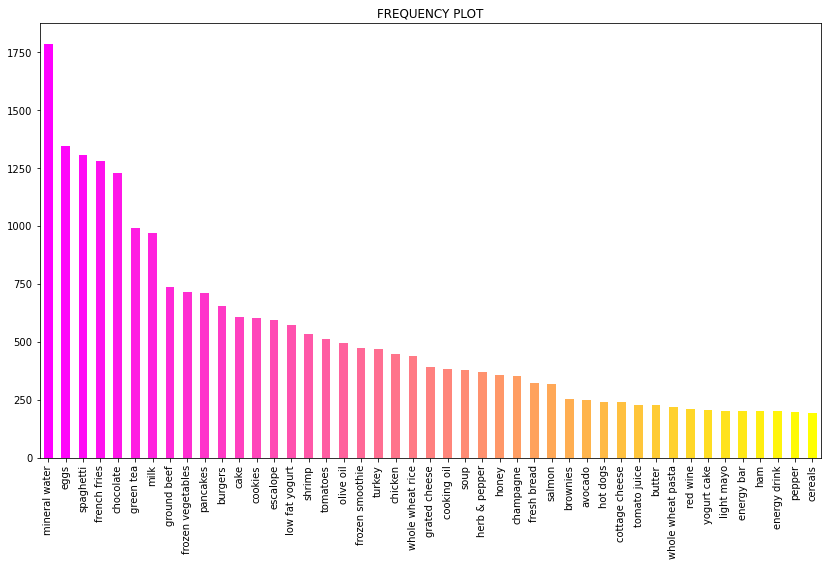

In [8]:
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 45 
color = plt.cm.spring(np.linspace(0, 1, cnt))
df_sum.head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()

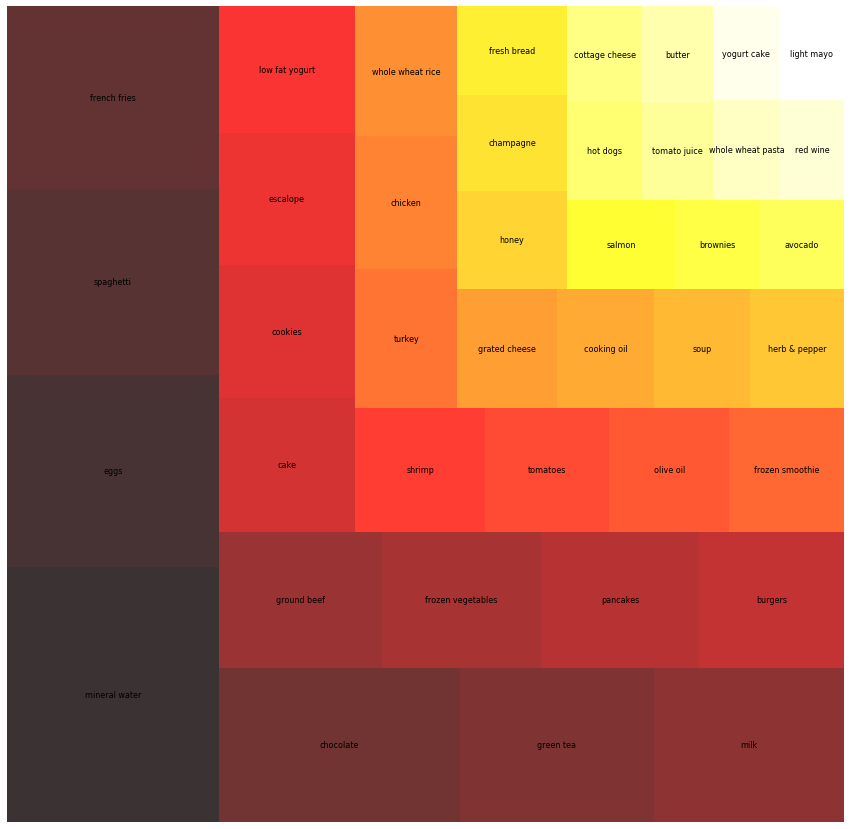

In [9]:
plt.figure(figsize=(15,15))
cnt = 40 
color = plt.cm.hot(np.linspace(0, 1, cnt))
df_part = df_sum.head(cnt)
squarify.plot(sizes = df_part.values, label = df_part.index, alpha=.8, color = color, text_kwargs={'fontsize':8})
plt.axis('off')
plt.show()

In [10]:
arr = []
for i in range(df.shape[0]):
    arr.append([str(df.values[i,j]) for j in range(df.shape[1])])

arr = np.array(arr)
print(arr.shape)

(7501, 20)


In [11]:
te = TransactionEncoder()
data = te.fit_transform(arr)
data = pd.DataFrame(data, columns = te.columns_)
data = data.drop(columns=['nan'])
print(data.shape)

(7501, 120)


In [12]:
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
frequent_itemsets=apriori(data, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [18]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.1) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314


In [19]:
table_data = association_rules(frequent_itemsets,metric="lift",min_threshold=1)
table_data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314


Based on the data above, a sound marketing strategy, would be to place mineral water with various products in the store. The data shows us that mineral water is often purchased with other products, or that customers who buy mineral water will also quickly grab some other food products. 